#  Simple Linear Regression Tutorial

**Goal**: Predict disease risk using health data


## Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

print("✅ Libraries loaded!")

✅ Libraries loaded!


## Step 2: Load Data

In [ ]:
df = pd.read_csv("health_lifestyle_dataset.csv")

print(f"📊 Dataset has {len(df)} rows and {len(df.columns)} columns")

print(" First 3 rows:")
print(df.head(3))

📊 Dataset has 100000 rows and 16 columns
👀 First 3 rows:
   id  age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0   1   56    Male  20.5         4198          3.9             3.4   
1   2   69  Female  33.3        14359          9.0             4.7   
2   3   46    Male  31.6         1817          6.6             4.2   

   calories_consumed  smoker  alcohol  resting_hr  systolic_bp  diastolic_bp  \
0               1602       0        0          97          161           111   
1               2346       0        1          68          116            65   
2               1643       0        1          90          123            99   

   cholesterol  family_history  disease_risk  
0          240               0             0  
1          207               0             0  
2          296               0             0  



🔎 Missing values per column:
id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64

📊 Basic Statistics:
                  id            age            bmi   daily_steps  \
count  100000.000000  100000.000000  100000.000000  100000.00000   
mean    50000.500000      48.525990      29.024790   10479.87029   
std     28867.657797      17.886768       6.352666    5483.63236   
min         1.000000      18.000000      18.000000    1000.00000   
25%     25000.750000      33.000000      23.500000    5729.00000   
50%     50000.500000      48.000000      29.000000   10468.00000   
75%     75000.250000      64.000000      34.500000   15229.00000   
max    100000.000000    

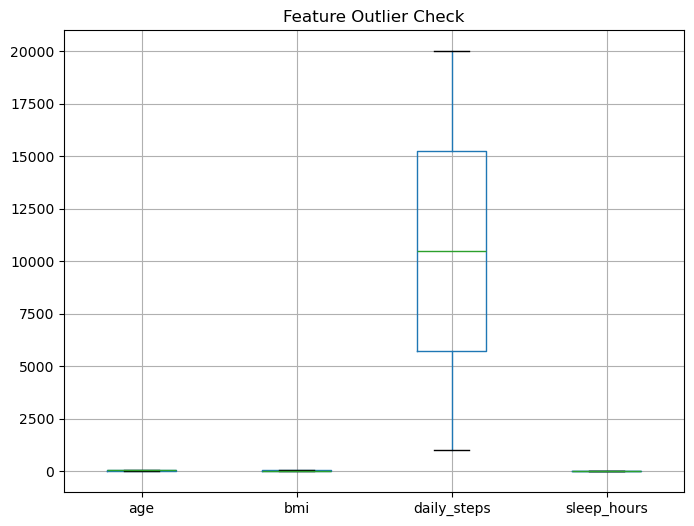

In [ ]:
print("\n🔎 Missing values per column:")
print(df.isnull().sum())

print("\n📊 Basic Statistics:")
print(df.describe())

df[["age","bmi","daily_steps","sleep_hours"]].boxplot(figsize=(8,6))
plt.title("Feature Outlier Check")
plt.show()


## Step 3: Prepare Data

In [ ]:
df['gender_num'] = (df['gender'] == 'Male').astype(int)

features = ['age', 'bmi', 'daily_steps', 'sleep_hours', 'gender_num']
X = df[features]
y = df['disease_risk']

print(f"✅ Using {len(features)} features to predict disease risk")
print(f"Features: {features}")

✅ Using 5 features to predict disease risk
Features: ['age', 'bmi', 'daily_steps', 'sleep_hours', 'gender_num']


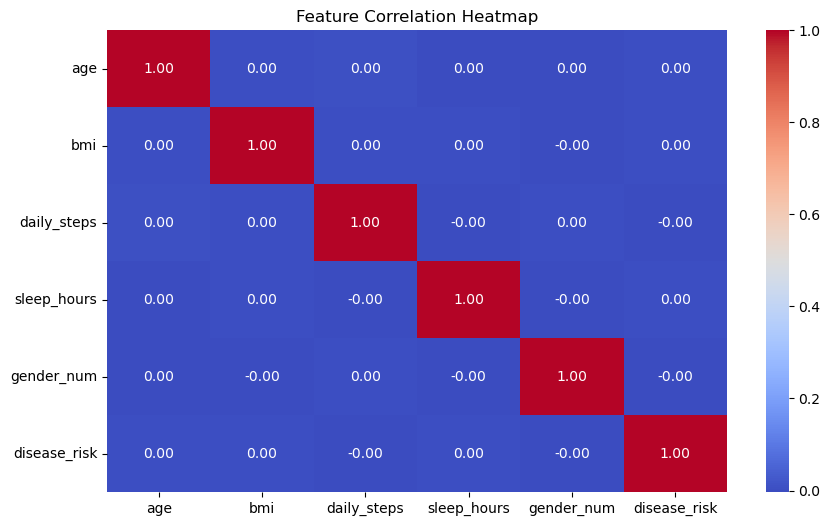

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df[features + ['disease_risk']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## Step 4: Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📚 Training data: {len(X_train)} samples")
print(f"🧪 Testing data: {len(X_test)} samples")

📚 Training data: 80000 samples
🧪 Testing data: 20000 samples


## Step 5: Train Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("🤖 Model trained successfully!")
print(f"📏 Intercept: {model.intercept_:.4f}")
print("\n📊 Feature importance:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:.4f}")

🤖 Model trained successfully!
📏 Intercept: 0.2366

📊 Feature importance:
  age: 0.0001
  bmi: 0.0003
  daily_steps: -0.0000
  sleep_hours: 0.0008
  gender_num: -0.0015


## Step 6: Make Predictions

In [ ]:
y_pred = model.predict(X_test)

print("🔮 Prediction Examples:")
print("Actual vs Predicted:")
for i in range(5):
    print(f"  {y_test.iloc[i]} vs {y_pred[i]:.3f}")

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\n📊 Model Performance:")
print(f"  R² Score: {r2:.4f}")
print(f"  Mean Absolute Error: {mae:.4f}")

🔮 Prediction Examples:
Actual vs Predicted:
  0 vs 0.252
  1 vs 0.246
  1 vs 0.243
  0 vs 0.253
  0 vs 0.245

📊 Model Performance:
  R² Score: -0.0003
  Mean Absolute Error: 0.3731


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"\n📚 Cross-Validated R²: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")



📚 Cross-Validated R²: -0.0001 (+/- 0.0001)


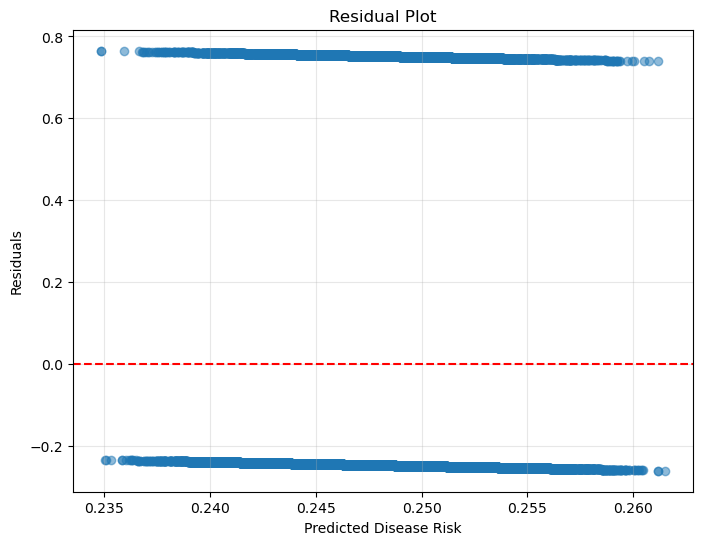

In [ ]:

residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Disease Risk")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(alpha=0.3)
plt.show()


## Step 7: Visualize Results

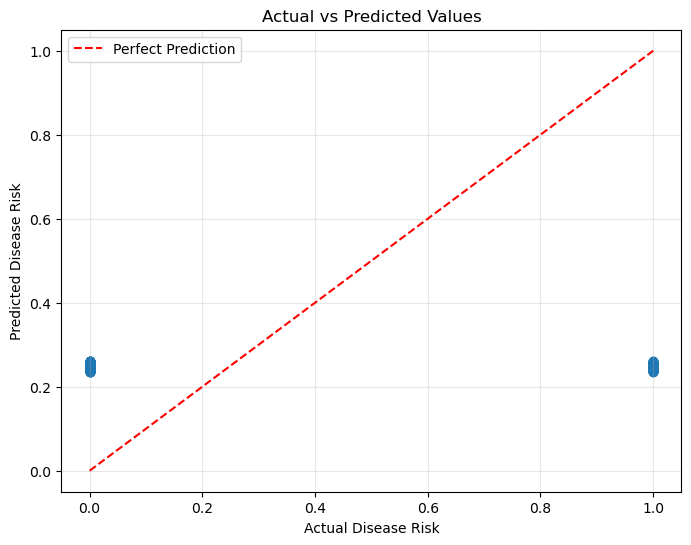

✅ Done! You've built your first Linear Regression model!


In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Disease Risk')
plt.ylabel('Predicted Disease Risk')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Done! You've built your first Linear Regression model!")